In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('CO2.csv',skiprows=(54))
data.drop(index=[0,1], inplace=True)
data.reset_index(drop=True, inplace=True)

In [4]:
data.shape

(744, 10)

In [5]:
df = data.drop(columns=['seasonally', '        fit', '  seasonally' , '      CO2', ' seasonally'])

In [6]:
df.rename(columns = {'  Yr':'Year',' Mn':'Month','    Date':'Date_Excel','      Date':'Date_Fraction', '     CO2':'CO2'}, 
          inplace = True)

In [7]:
#Drop Missing Values
df = df[df['CO2']!='   -99.99']

In [8]:
df.reset_index(inplace=True)

In [9]:
df.drop(columns=['Year','Month','Date_Excel','Date_Fraction'],inplace=True)

In [10]:
df.rename(columns = {'index':'Month'},inplace=True)

In [11]:
df['Month']=(df['Month']+0.5)/12

In [12]:
df['CO2'] = df['CO2'].astype(float)

In [13]:
X = df['Month']
Y = df['CO2']
X = np.array(X).reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [14]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [15]:
lm.intercept_

305.5221875860958

In [16]:
lm.coef_

array([1.57960444])

In [17]:
prediction = lm.predict(X_train)
residual = Y_train - prediction

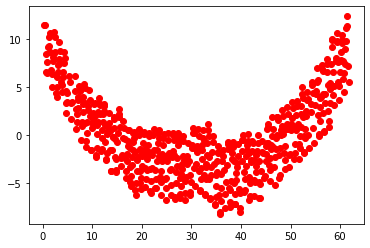

In [18]:
plt.scatter(X_train,residual,color="red")

In [19]:
print(metrics.mean_squared_error(Y_train, prediction))
print(metrics.mean_absolute_percentage_error(Y_train, prediction))

18.496795929841614
0.009671416151865574


In [20]:
from sklearn.preprocessing import PolynomialFeatures
X = df['Month']
Y = df['CO2']
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(np.array(X).reshape(-1, 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [21]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, Y_train)

LinearRegression()

In [22]:
print(poly_reg_model.coef_)
print(poly_reg_model.intercept_)

[0.75549165 0.01314654]
314.4010270845032


In [23]:
prediction = poly_reg_model.predict(X_train)
residual = Y_train-prediction

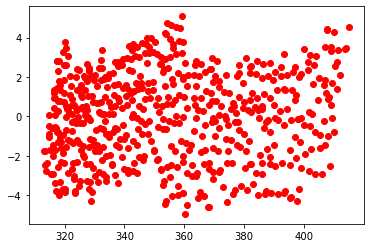

In [24]:
plt.scatter(Y_train, residual,color="red")

In [25]:
print(metrics.mean_squared_error(Y_train, prediction))
print(metrics.mean_absolute_percentage_error(Y_train, prediction))

4.9506467445303715
0.005268845149603935


In [202]:
X = df['Month']
Y = df['CO2']
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(np.array(X).reshape(-1, 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, Y_train)
print(poly_reg_model.coef_)
print(poly_reg_model.intercept_)

[8.33762663e-01 1.00321808e-02 3.33257505e-05]
313.97470662942885


4.92916724249678
0.005266922959777504


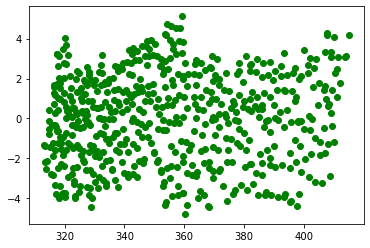

In [203]:
prediction = poly_reg_model.predict(X_train)
residual = Y_train-prediction
plt.scatter(Y_train, residual,color="green")
print(metrics.mean_squared_error(Y_train, prediction))
print(metrics.mean_absolute_percentage_error(Y_train, prediction))

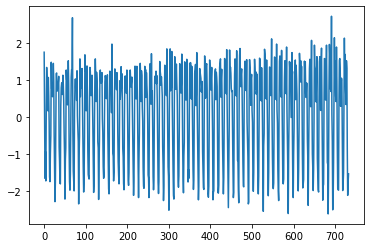

In [28]:
from matplotlib import pyplot
diff = list()
for i in range(1,len(df['CO2'])):
    value = df['CO2'][i] - df['CO2'][i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [29]:
Jan = [(i+0.5)/12 for i in range(0,732,12)]

In [30]:
jan_final = list()
for num in Jan:
    for month in list(df['Month']):
        if num == month:
            jan_final.append(num)

In [31]:
X = df['Month']
Y = df['CO2']
poly = PolynomialFeatures(degree=3,include_bias=False)
X = poly.fit_transform(np.array(X).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(X, Y)
prediction = poly_reg_model.predict(X)
residual = Y-prediction
dfpoly = df.copy()
dfpoly['residual']=residual

In [32]:
dfpoly[dfpoly['Month'].isin(jan_final)]['residual'].mean()

0.0236546552982882

In [78]:
Feb = [(i+1.5)/12 for i in range(0,732,12)]
feb_final = list()
for num in Feb:
    for month in df['Month']:
        if num == month:
            feb_final.append(num)

In [79]:
dfpoly[dfpoly['Month'].isin(feb_final)]['residual'].mean()

0.6607768935795103

In [83]:
month_final = list()
P_final = list()
Mon = list()
for a in range(12):
    month_final=list()
    Mon = [(i+a+0.5)/12 for i in range(0,732,12)]
    for num in Mon:
        for month in dfpoly['Month']:
            if num == month:
                month_final.append(num)
    P_final.append(dfpoly[dfpoly['Month'].isin(month_final)]['residual'].mean())
P_final               

[0.0236546552982882,
 0.6607768935795103,
 1.353261212999653,
 2.58557022174865,
 3.0495989330254303,
 2.3328053757820433,
 0.7239058407596268,
 -1.3978172220727725,
 -3.1929990726403337,
 -3.3417554202362707,
 -2.0632477126889848,
 -0.9011015769093901]

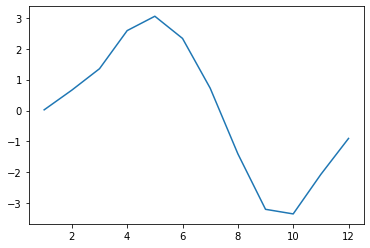

In [128]:
P_final = [0.0236546552982882,
 0.6607768935795103,
 1.353261212999653,
 2.58557022174865,
 3.0495989330254303,
 2.3328053757820433,
 0.7239058407596268,
 -1.3978172220727725,
 -3.1929990726403337,
 -3.3417554202362707,
 -2.0632477126889848,
 -0.9011015769093901]

month = range(1,13)

pyplot.plot(month,P_final)

In [151]:
X = df['Month']
Y = df['CO2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_trainT = poly.fit_transform(np.array(X_train).reshape(-1, 1))
X_testT = poly.fit_transform(np.array(X_test).reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_trainT, Y_train)
prediction_train = poly_reg_model.predict(X_trainT)
prediction_test = poly_reg_model.predict(X_testT)

In [152]:
train = pd.DataFrame()
test = pd.DataFrame()
train['Month'] = X_train
train['CO2'] = prediction_train
test['Month'] = X_test
test['CO2'] = prediction_test

In [153]:
for a in range(12):
    month_final=list()
    Mon = [(i+a+0.5)/12 for i in range(0,732,12)]
    for num in Mon:
        for month in train['Month']:
            if num == month:
                train.loc[train['Month']==num,'CO2'] += P_final[a]
for a in range(12):
    month_final=list()
    Mon = [(i+a+0.5)/12 for i in range(0,732,12)]
    for num in Mon:
        for month in test['Month']:
            if num == month:
                test.loc[test['Month']==num,'CO2'] += P_final[a]

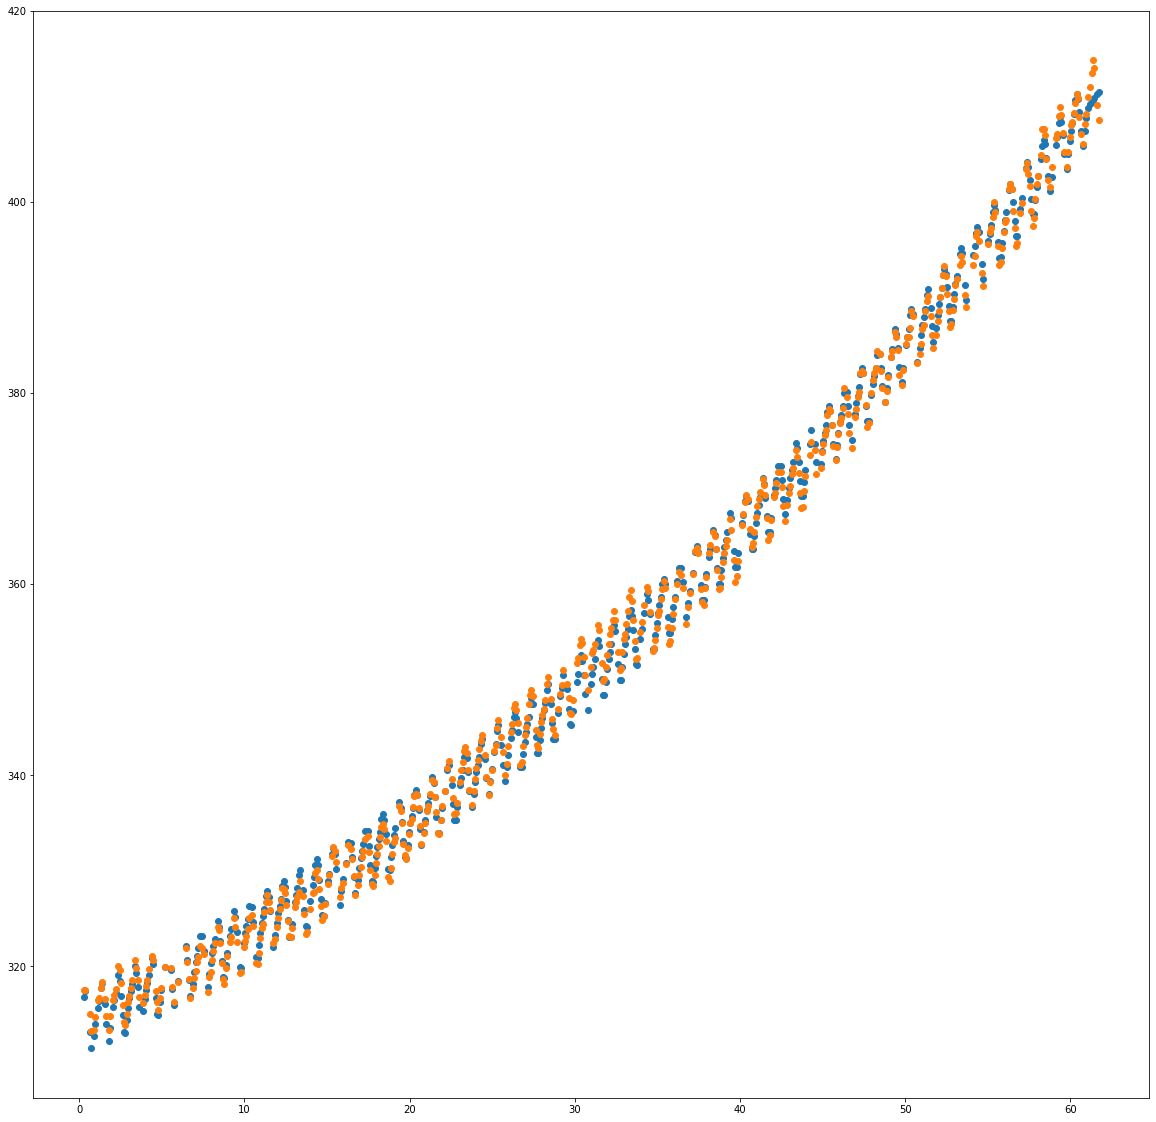

In [179]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
pyplot.scatter(train['Month'],train['CO2'])
pyplot.scatter(train['Month'],Y_train)

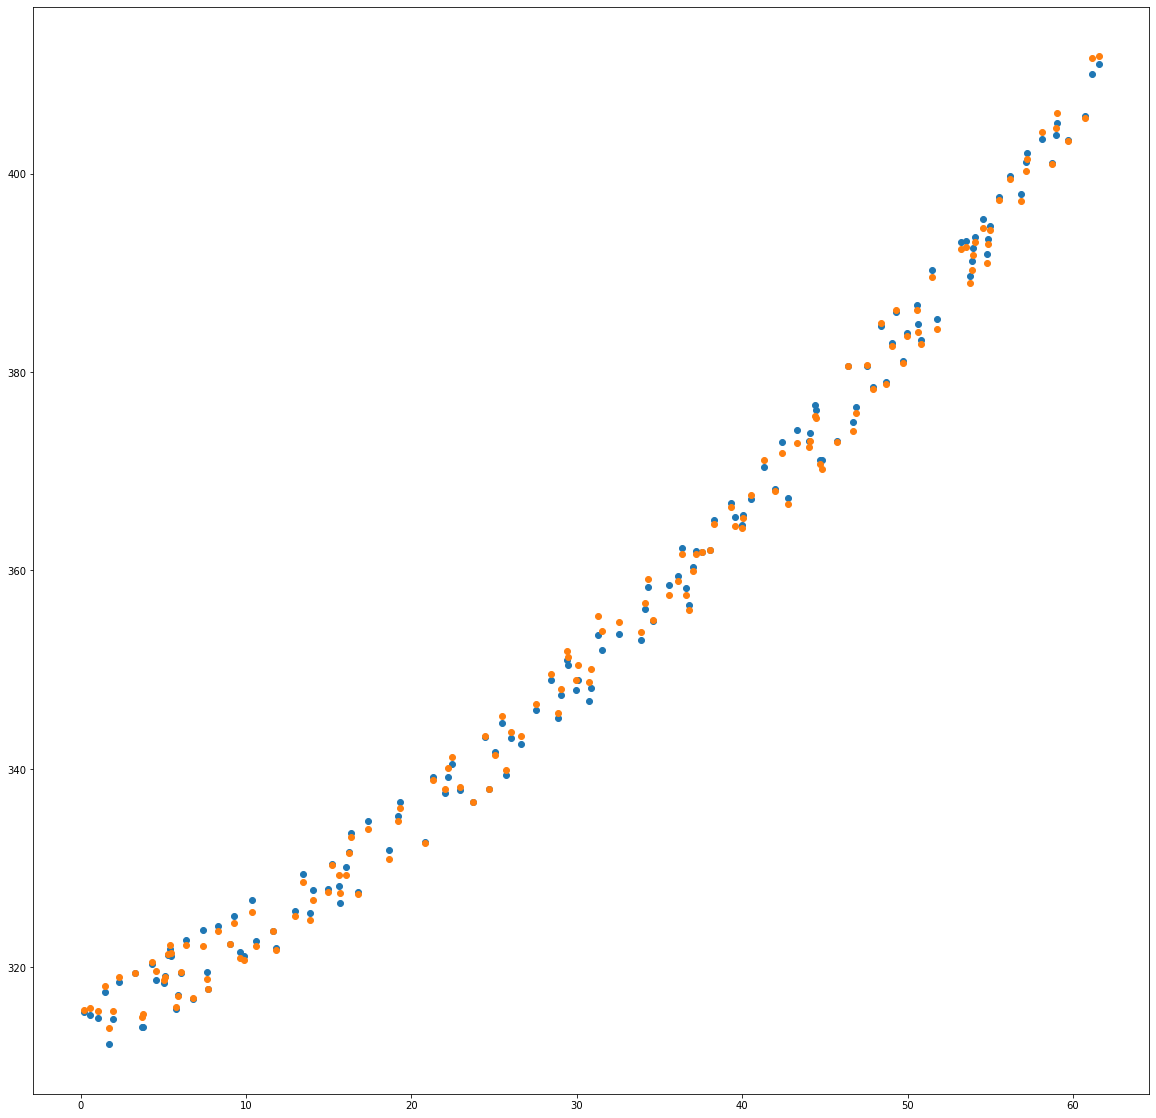

In [180]:
figure(figsize=(20, 20))
pyplot.scatter(test['Month'],test['CO2'])
pyplot.scatter(test['Month'],Y_test)

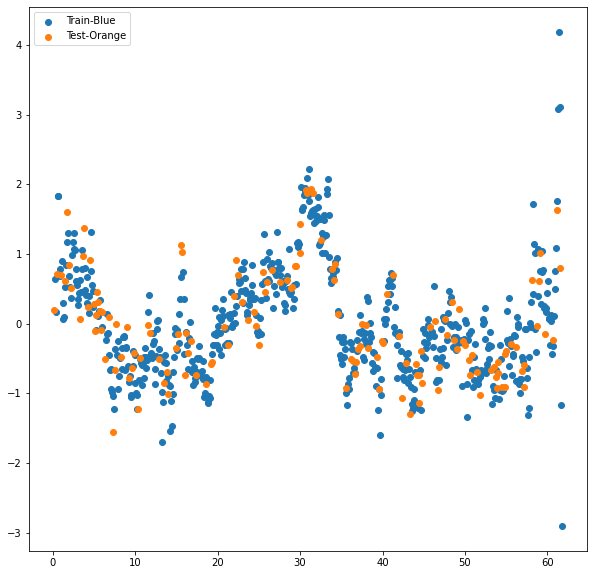

In [188]:
figure(figsize=(10, 10))
pyplot.scatter(train['Month'],Y_train-train['CO2'])
pyplot.scatter(test['Month'],Y_test-test['CO2'])
pyplot.legend(['Train-Blue','Test-Orange'])

In [191]:
print("RMSE is",metrics.mean_squared_error(Y_test, test['CO2']))
print("MAPE is",metrics.mean_absolute_percentage_error(Y_test, test['CO2']))

RMSE is 0.5294425387793895
MAPE is 0.0016900365575914869


In [200]:
Prange = max(P_final) - min(P_final)
Rrange = max(Y_test-test['CO2']) - min(Y_test-test['CO2'])
Frange = max(prediction_test) - min(prediction_test)

In [201]:
print(Frange/Prange)
print(Prange/Rrange)

15.161148284993317
1.8324150181665695
